
# Project: Investigate IMDb Dataset.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> IMDB movie data, some people would wonder what is the importance of exploring this kind of dataset, but actually, it would answer so many and important questions that would make this field much clearer for people who would like to invest in it, and I hope by the end of this report I will help any company who plans to make a movie to know what's the key areas to success.

> This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings, popularity, director and revenue.
>

 ### Questions : 

### Research Question 1: Describe the correlation between budget and revenue.
### Research Question 2: Are the new movies(2000's) are having the highest ratings? or movies from the era before(1980-1999) are having higher ratings?
### Research Question 3: Are all movies with high revenue have a high rate? and would they have a high number of runtime too?

> First, importing the required data and packages.

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [244]:
df = pd.read_csv('imdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08


### Data Cleaning (according to the source, the dataset is cleaned from original)
> Although I believe that there are certain columns that I don't need in this study, therefore I will drop it

In [245]:
# droping id and imdb_id columns
df.drop(['imdb_id'], axis = 1,inplace=True) 
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   homepage              2936 non-null   object 
 7   director              10822 non-null  object 
 8   tagline               8042 non-null   object 
 9   keywords              9373 non-null   object 
 10  overview              10862 non-null  object 
 11  runtime               10866 non-null  int64  
 12  genres                10843 non-null  object 
 13  production_companies  9836 non-null   object 
 14  release_date          10866 non-null  object 
 15  vote_count         

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Describe the correlation between budget and revenue.


Text(0, 0.5, 'Revenue')

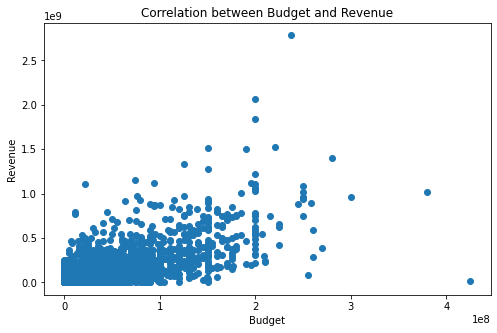

In [246]:
plt.figure(figsize=(8,5))
cl1 = df['budget']
cl2 = df['revenue']
plt.scatter(df.budget, df.revenue)
plt.title('Correlation between Budget and Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')


> **NOTE:** 1e8 is standard scientific notion, and here it indicates an overall scale factor for the x-axis. That is, if there's a 2 on the y-axis and a 1e8 at the top, the value at 2 actually indicates 2*1e8 = 2e8 = 2 * 10^8 = 200,000,000.

In [247]:
## And we cam calculate the correlation between budget and revenue directly by using df.corr() fonction
print(cl1.corr(cl2))

0.7349006819076118


> **Therefore,** the correlation between budget and revenue was positive, and from here we understand that the more was the budget the more was the revenue.

### Research Question 2: Are the new movies(2000's) are having the highest ratings? or movies from the era before(1980-1999) are having higher ratings?

In [248]:
# First of all I will create a new dataframe which having all movies that was released in the last 20 years 
# and another dataframe for movies 1980-1999
# and a last dataframe for movies 1960-1979

df_2000s = df[df['release_year'] >= 2000]
df_80s90s = df[((df['release_year'] >= 1980) & (df['release_year'] < 2000))]
df_60s70s = df[((df['release_year'] >= 1960) & (df['release_year'] < 1980))]

df_60s70s.head(2)


,id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1329,11,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",android|galaxy|hermit|death star|lightsaber,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,39575591.36,2.789712e+09
1330,691,2.379469,14000000,185438673,The Spy Who Loved Me,Roger Moore|Barbara Bach|Curd JÃ¼rgens|Richard...,http://www.mgm.com/view/movie/1891/The-Spy-Who...,Lewis Gilbert,It's the BIGGEST. It's the BEST. It's BOND. An...,london|submarine|england|assassination|spy,Russian and British submarines with nuclear mi...,125,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,07/07/1977,279,6.2,1977,50368934.46,6.671677e+08


In [249]:
# Now I will create a new dataframe which having the top 1000 movies of all time.

df_topR = df.nlargest(1000, 'vote_average')
df_topR
df_topR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 3894 to 10256
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   popularity            1000 non-null   float64
 2   budget                1000 non-null   int64  
 3   revenue               1000 non-null   int64  
 4   original_title        1000 non-null   object 
 5   cast                  970 non-null    object 
 6   homepage              418 non-null    object 
 7   director              984 non-null    object 
 8   tagline               678 non-null    object 
 9   keywords              857 non-null    object 
 10  overview              999 non-null    object 
 11  runtime               1000 non-null   int64  
 12  genres                994 non-null    object 
 13  production_companies  841 non-null    object 
 14  release_date          1000 non-null   object 
 15  vote_count       

In [250]:
# Renaimg columns to be ready for the merging procces.
df_2000s.rename(columns=lambda x: x[:20] + "_2000s",inplace=True)
df_80s90s.rename(columns=lambda x: x[:20] + "_80s90s",inplace=True)
df_60s70s.rename(columns=lambda x: x[:20] + "_60s70s",inplace=True)

df_60s70s.head(2)

C:\Users\msm-5\anaconda3\lib\site-packages\pandas\core\frame.py:4295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,id_60s70s,popularity_60s70s,budget_60s70s,revenue_60s70s,original_title_60s70s,cast_60s70s,homepage_60s70s,director_60s70s,tagline_60s70s,keywords_60s70s,overview_60s70s,runtime_60s70s,genres_60s70s,production_companies_60s70s,release_date_60s70s,vote_count_60s70s,vote_average_60s70s,release_year_60s70s,budget_adj_60s70s,revenue_adj_60s70s
1329,11,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",android|galaxy|hermit|death star|lightsaber,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,39575591.36,2.789712e+09
1330,691,2.379469,14000000,185438673,The Spy Who Loved Me,Roger Moore|Barbara Bach|Curd JÃ¼rgens|Richard...,http://www.mgm.com/view/movie/1891/The-Spy-Who...,Lewis Gilbert,It's the BIGGEST. It's the BEST. It's BOND. An...,london|submarine|england|assassination|spy,Russian and British submarines with nuclear mi...,125,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,07/07/1977,279,6.2,1977,50368934.46,6.671677e+08


> I'll merge each dataframe that i created with the top movies dataframe so i can explore it using visuals

In [251]:
# Top Movies of 2000s
df_2000sTopRatings = df_2000s.merge(df_topR, left_on='id_2000s', right_on='id', how = 'inner' )
df_2000sTopRatings.head(1)


,id_2000s,popularity_2000s,budget_2000s,revenue_2000s,original_title_2000s,cast_2000s,homepage_2000s,director_2000s,tagline_2000s,keywords_2000s,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09


In [252]:
# Top Movies of 80s+90s
df_80s90sTopRatings = df_80s90s.merge(df_topR, left_on='id_80s90s', right_on='id', how = 'inner')
df_80s90sTopRatings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 0 to 218
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_80s90s                    219 non-null    int64  
 1   popularity_80s90s            219 non-null    float64
 2   budget_80s90s                219 non-null    int64  
 3   revenue_80s90s               219 non-null    int64  
 4   original_title_80s90s        219 non-null    object 
 5   cast_80s90s                  216 non-null    object 
 6   homepage_80s90s              42 non-null     object 
 7   director_80s90s              218 non-null    object 
 8   tagline_80s90s               172 non-null    object 
 9   keywords_80s90s              207 non-null    object 
 10  overview_80s90s              219 non-null    object 
 11  runtime_80s90s               219 non-null    int64  
 12  genres_80s90s                219 non-null    object 
 13  production_companies

In [253]:
# Top Movies of 60s+70s
df_60s70sTopRatings = df_60s70s.merge(df_topR, left_on='id_60s70s', right_on='id', how = 'inner')
df_60s70sTopRatings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_60s70s                    105 non-null    int64  
 1   popularity_60s70s            105 non-null    float64
 2   budget_60s70s                105 non-null    int64  
 3   revenue_60s70s               105 non-null    int64  
 4   original_title_60s70s        105 non-null    object 
 5   cast_60s70s                  104 non-null    object 
 6   homepage_60s70s              10 non-null     object 
 7   director_60s70s              105 non-null    object 
 8   tagline_60s70s               89 non-null     object 
 9   keywords_60s70s              101 non-null    object 
 10  overview_60s70s              105 non-null    object 
 11  runtime_60s70s               105 non-null    int64  
 12  genres_60s70s                105 non-null    object 
 13  production_companies

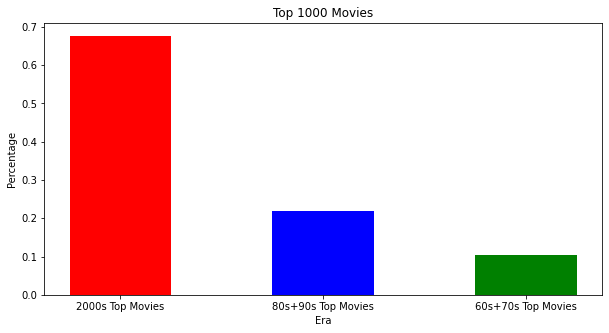

In [254]:
# Now I'm going to check how much percent does the top 1000 movies consist of movies from 2000s and 80s90s and lastly 60s70s

l2000s = len(df_2000sTopRatings.index)
l80s90s = len(df_80s90sTopRatings.index)
l60s70s = len(df_60s70sTopRatings.index)

p2000s = l2000s/1000
p80s90s = l80s90s/1000
p60s70s = l60s70s/1000

p = 1
f, ax = plt.subplots(figsize=(10,5))
plt.bar([1, 2,3], [p2000s, p80s90s,p60s70s], tick_label=['2000s Top Movies', '80s+90s Top Movies','60s+70s Top Movies'],color=['red', 'blue', 'green'], width = 0.5)
plt.title('Top 1000 Movies')
plt.xlabel('Era')
plt.ylabel('Percentage');

### Research Question 3: Are all movies with high revenue have a high rate? and would they have a high number of runtime too?

> First I'm going to make a dataframe with the top 10 movies of the revenue.

In [255]:
df_mostRev =  df.nlargest(10, 'revenue')
df_mostRev.head(3)

,id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,culture clash|future|space war|space colony|so...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/2009,8458,7.1,2009,240886902.9,2.827124e+09
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
5231,597,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,shipwreck|iceberg|ship|panic|titanic,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,271692064.2,2.506406e+09


> Now I will plot a bar with a marker line in the same chart, in the first chart, the bar will respresnt the reveneu of the movie, and the line chart would represent the rating of the movie.

> And in the second chart, the bar will respresnt the reveneu of the movie and, the line chart would represent the number of runtimes of the movie.


Text(0, 0.5, 'Runtime')

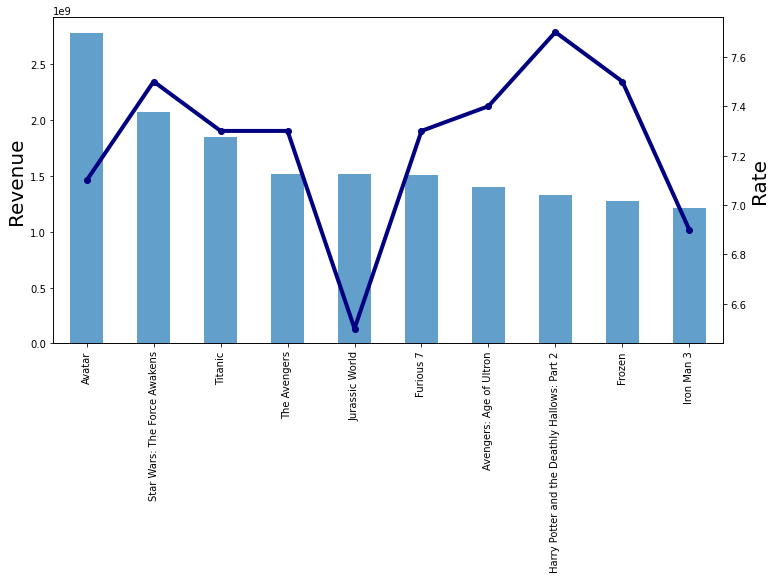

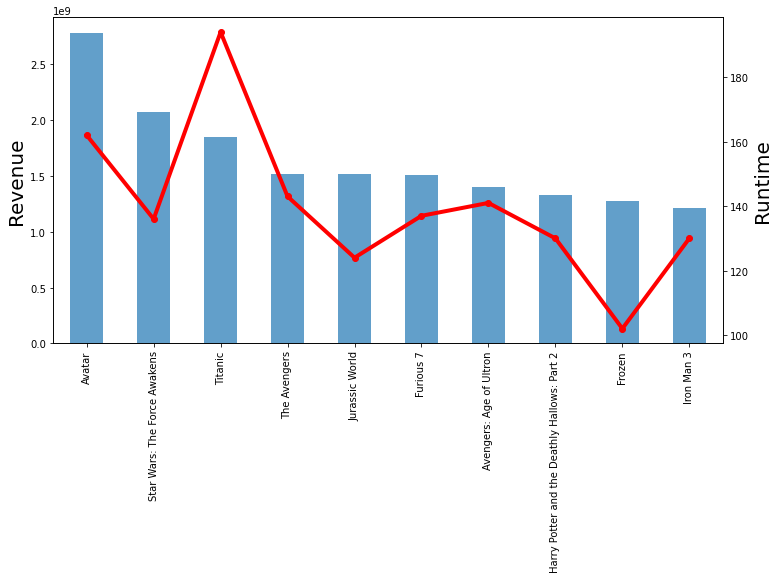

In [256]:
#df_mostRev.plot(x = 'original_title', y = ['vote_average','revenue', 'runtime'], kind = 'bar', figsize=(20,10))
df_mostRev.set_index('original_title')


fig = plt.figure()
ax = df_mostRev['revenue'].plot(kind="bar", alpha=0.7,figsize=(12,6))

ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),df_mostRev['vote_average'],marker='o', c='navy', linewidth=4)

ax.set_xticklabels(df_mostRev['original_title'])
ax.set_ylabel('Revenue', size = 20)
ax2.set_ylabel('Rate', size = 20)

fig2 = plt.figure()
axx = df_mostRev['revenue'].plot(kind="bar", alpha=0.7,figsize=(12,6))

axx2 = axx.twinx()
axx2.plot(ax.get_xticks(),df_mostRev['runtime'],marker='o', c='r', linewidth=4)

axx.set_xticklabels(df_mostRev['original_title'])
axx.set_ylabel('Revenue', size = 20)
axx2.set_ylabel('Runtime', size = 20)






>**Therefore,**  we conclude that there're multiple movies which they have a high rate are having a low revenue comparing to its rating. and also when we compare the revenue with the number of runtimes, we see that there's a fluctuation in the numbers.

>So from this study I conclude that the success of a high revenue depends on multiple things not only the quality of the movie (the story, writing, staff, sound, and theory effects), it depends on the commercials for movie and marketing in the right way.

<a id='conclusions'></a>
## Conclusions

 > This study has helped me a lot in understanding the key success of movies, for example in the first question the correlation between budget and revenue was positive, and from here we understand that the more was the budget the more was the revenue.
 
 > And from the second question which I believe was the perfect one, lots of people are wondering which movies are better? the old categories or new kinds? the study has helped me to prove that most movie lovers would like the new era of movies much better than the old days.
 
> And my last point was to answer my own question, would all movies with high ratings (which means that people liked this movie) have a high revenue? it appears that it's not, even if the runtimes were so high.